The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


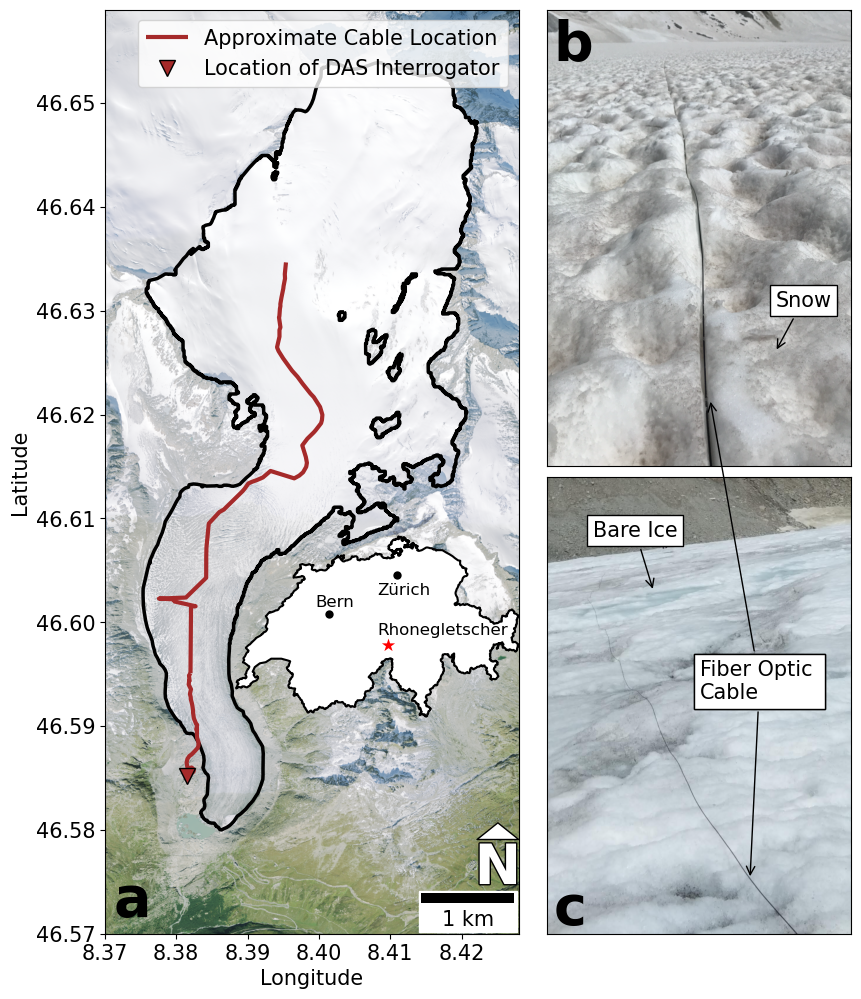

In [4]:
from rasterio.plot import show
from rasterio.merge import merge
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import shapefile as shp
import geopandas
from matplotlib_scalebar.scalebar import ScaleBar

from rasterio.enums import Resampling
import rasterio
import matplotlib.patheffects as pe

#import Rhone outline
rhone_outline = geopandas.read_file("rhone_map_shapefiles/rhone_outline_adapted.shp")
cable_location = geopandas.read_file("rhone_map_shapefiles/cable_location_final.shp")

upscale_factor = 1 #scaling factor for Rhone images


#Import Rhone image
with rasterio.open('rhone_wgs84.tif') as dataset:

    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        #resampling=Resampling.bilinear
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )




fig = plt.figure(figsize=(10,12))
gs = fig.add_gridspec(2,2, wspace=0, hspace=0.025, width_ratios=[1.5, 1])

ax = fig.add_subplot(gs[:, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])


fig.patch.set_facecolor('white')

show(data, transform = transform,ax=ax)

ax.set_ylim([46.57, 46.659])
ax.set_xlim([8.37, 8.428])
rhone_outline.plot(ax=ax, facecolor='None', lw = 2.5, label = 'Rhonegletscher')
cable_location.plot(ax=ax, lw = 3, color = 'brown', label = 'Approximate Cable Location')

#DAS location
ax.plot(8.3815,46.58515, label='Location of DAS Interrogator', 
           marker='v', markerfacecolor = 'brown', markeredgecolor='black', linestyle = 'None', markersize = 12)

# Create scale bar
import numpy as np
import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import haversine_distances

# A=[8.37*np.pi/180.,46.57*np.pi/180.] #Latitude of interest here 46.57 deg, longitude 8.37
# B=[8.17*np.pi/180.,46.57*np.pi/180.] ##Latitude of interest here 46.57 deg, longitude 8.37+1
# dx=(6371000)*haversine_distances([A,B])[0,1] #6371000 radius in m of Earth

from shapely.geometry.point import Point

points = gpd.GeoSeries([Point(7.9, 46.575), Point(8.9, 46.575)], crs=4326)  # Geographic WGS 84 - degrees
points = points.to_crs(32632) # Projected WGS 84 - meters
dx = points[0].distance(points[1])

#Scalebar
scalebar = ScaleBar(dx, 'm', location = 'lower right', font_properties = dict(size=15), length_fraction=0.25)
ax.add_artist(scalebar)

# North arrow
x, y, arrow_length = 0.95, 0.12, 0.05
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length), c= 'white', weight='bold', 
            path_effects=[pe.withStroke(linewidth=2, foreground="black")],
            arrowprops=dict(facecolor='white', width=10, headwidth=30),
            ha='center', va='center', fontsize=40,
            xycoords=ax.transAxes)

#Label

ax.annotate('a', xy=(.02,.02) ,xycoords=ax.transAxes, fontsize=40, weight='bold')


ax.set_xlabel('Longitude', size = 15)
ax.set_ylabel('Latitude', size = 15)

#Ax paramteters
ax.tick_params(axis='both', which='major', labelsize=15)

ax.legend(fontsize=15)

#Swiss map inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axins = inset_axes(ax, width="100%", height="100%",
                    bbox_to_anchor=(.3, .19, .75, .3),
                    bbox_transform=ax.transAxes)
axins.patch.set_alpha(0)

swiss_outline = geopandas.read_file("swiss_map_files/CHE_adm0.shp")
cities_locations = geopandas.read_file("swiss_map_files/places_of_interest.shp")
rhone_location = geopandas.read_file("swiss_map_files/rhone_location.shp")

swiss_outline.plot(ax=axins, facecolor='white', edgecolor = 'black', lw = 1.5, label = 'Switzerland')

cities_locations.plot(ax=axins, lw = 0, color = 'black', label = 'Cities')
axins.annotate('Bern', xy=(.3,.6),xycoords='axes fraction', fontsize=12)
axins.annotate('Zürich', xy=(.5,.66),xycoords='axes fraction', fontsize=12)

rhone_location.plot(ax=axins, marker = '*', markersize = 100, lw = 0, color = 'red', label = 'Rhonegletscher')
axins.annotate('Rhonegletscher', xy=(.5,.46),xycoords='axes fraction', fontsize=12)

axins.axis('off')
axins.set_xticks([])
axins.set_yticks([])
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# swiss_map = mpimg.imread('Swiss_map_updated.png')
# imagebox_swiss = OffsetImage(swiss_map, zoom=.085)
# xy = [8.407,46.6]

# ab_swissmap = AnnotationBbox(imagebox_swiss, xy, frameon=False)
# ax.add_artist(ab_swissmap)


#ax1


img1 = mpimg.imread('accum_zone_img.png')
imgplot = ax1.imshow(img1)


ax1.set_xticks([])
ax1.set_yticks([])


#Label

ax1.annotate('b', xy=(.02,.89) ,xycoords=ax1.transAxes, fontsize=40, weight='bold')

#ax2

img2 = mpimg.imread('ablation_zone_img.png')
imgplot = ax2.imshow(img2)


ax2.set_xticks([])
ax2.set_yticks([])

#Label

ax2.annotate('c', xy=(.02,.02) ,xycoords=ax2.transAxes, fontsize=40, weight='bold')


#annotate the cable

plt.annotate('Fiber Optic \nCable',
             xy=(.75,.1),
             xytext=(.7,.25), xycoords='figure fraction',
             fontsize=15, bbox=dict(fc="w"), 
             arrowprops=dict(arrowstyle="->"))

plt.annotate('Fiber Optic \nCable',
             xy=(.71,.5),
             xytext=(.7,.25), xycoords='figure fraction',
             fontsize=15, bbox=dict(fc="w"), 
             arrowprops=dict(arrowstyle="->"))

# annotate the surface conditions

ax1.annotate('Snow', xy=(.75,.25), xytext=(.75,.35), 
             xycoords=ax1.transAxes, fontsize=15, 
             bbox=dict(fc="w"), arrowprops=dict(arrowstyle="->"))

ax2.annotate('Bare Ice', xy=(.35,.75), xytext=(.15,.87), 
             xycoords=ax2.transAxes, fontsize=15, 
             bbox=dict(fc="w"), arrowprops=dict(arrowstyle="->"))

fig.savefig('figure1_map.eps', bbox_inches='tight')

plt.show()
